In [1]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data = pd.read_csv('games.csv')

data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   winner              51490 non-null  int64
 4   firstBlood          51490 non-null  int64
 5   firstTower          51490 non-null  int64
 6   firstInhibitor      51490 non-null  int64
 7   firstBaron          51490 non-null  int64
 8   firstDragon         51490 non-null  int64
 9   firstRiftHerald     51490 non-null  int64
 10  t1_champ1_sum1      51490 non-null  int64
 11  t1_champ1_sum2      51490 non-null  int64
 12  t1_champ2_sum1      51490 non-null  int64
 13  t1_champ2_sum2      51490 non-null  int64
 14  t1_champ3_sum1      51490 non-null  int64
 15  t1_champ3_sum2      51490 non-null  int64
 16  t1_champ4_sum1      51490 non-null  int6

In [16]:
data = data[data['gameDuration']>=300]
data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [17]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [18]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
prediction = nb.predict(X_test)
accuracy_test = accuracy_score(y_test,prediction.round())
print( "Accuracy =", accuracy_test )

Accuracy = 0.9498956158663883


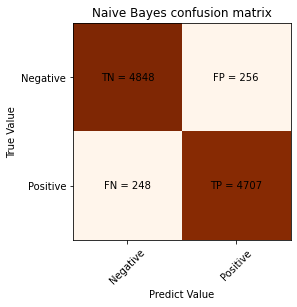

In [20]:
y_pred = nb.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Naive Bayes confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


#plt.savefig("NB_con",dpi=240, bbox_inches='tight')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.95133   0.94984   0.95059      5104
           2    0.94842   0.94995   0.94918      4955

    accuracy                        0.94990     10059
   macro avg    0.94988   0.94990   0.94989     10059
weighted avg    0.94990   0.94990   0.94990     10059



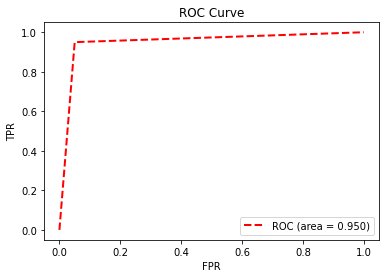

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thersholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', color='red',label='ROC (area = {0:.3f})'.format(roc_auc), lw=2)

    
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.savefig('NB-roc',dpi=240,bbox_inches='tight')
plt.show()